<a href="https://colab.research.google.com/github/SarahLares/KPMG_virtual_intership/blob/master/Data_Quality_Assessment_KPMG_Virtual_intership.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

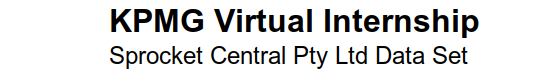

## **First Task:** Data Quality.

The client provided KPMG with 3 datasets:

* Customer Demographic 


* Customer Addresses


* Transactions data in the past 3 months


You decide to start the preliminary data exploration and identify ways to improve the quality of Sprocket Central Pty Ltd’s data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the Data

In [ ]:
df_Costumer_Address = pd.read_csv('/tmp/CustomerAddress.csv')
df_Costumer_Demographic = pd.read_csv('/tmp/CustomerDemographic.csv')
df_Transactions = pd.read_csv('/tmp/Transactions.csv')

let's take a look at the data

In [ ]:
df_Costumer_Address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [ ]:
df_Costumer_Demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,01-feb,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [ ]:
df_Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,25/02/2017,0.0,Approved,Solex,Standard,medium,medium,"71,49","$53,62",41245.0
1,2,3,3120,21/05/2017,1.0,Approved,Trek Bicycles,Standard,medium,large,"2091,47","$388,92",41701.0
2,3,37,402,16/10/2017,0.0,Approved,OHM Cycles,Standard,low,medium,"1793,43","$248,82",36361.0
3,4,88,3135,31/08/2017,0.0,Approved,Norco Bicycles,Standard,medium,medium,"1198,46","$381,10",36145.0
4,5,78,787,01/10/2017,1.0,Approved,Giant Bicycles,Standard,medium,large,"1765,3","$709,48",42226.0


In [ ]:
print('Number of customer in master file {}'.format(df_Costumer_Demographic.shape[0]))
print('Number of customer in the address file {}'.format(df_Costumer_Address.shape[0]))


Number of customer in master file 4000
Number of customer in the address file 3999




> Both files must have the same number of customers, since they have the same period of time.



### Warm up task

We order the data set in an ascending order according to the date of birth of the Costumers

In [ ]:
df_Costumer_Demographic.sort_values(by= ['DOB'])

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0
719,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6.0
1091,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5.0
3409,3410,Merrili,Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,N,á,No,16.0
2412,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,3779,Ulick,Daspar,U,68,NaN,NaN,IT,Affluent Customer,N,NaN,No,NaN
3882,3883,Nissa,Conrad,U,35,NaN,Legal Assistant,IT,Mass Customer,N,NaN,No,NaN
3930,3931,Kylie,Epine,U,19,NaN,NaN,IT,High Net Worth,N,NaN,Yes,NaN
3934,3935,Teodor,Alfonsini,U,72,NaN,NaN,IT,High Net Worth,N,NaN,Yes,NaN




> If we take a look at the first client (Jephthah Bachmann, we can see that he was born in 1843, which means that they are 177 years old. This is obviously an error in the data.



### Missing Values

Let's proceed to count the missing values ​​in all data frames

In [ ]:
print('Missing Values in CustomerAddress \n\n{}'.format(df_Costumer_Address.isnull().sum()))

Missing Values in CustomerAddress 

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64


In [ ]:
print('\nMissing Values in CustomerDemographic \n\n{}'.format(df_Costumer_Demographic.isnull().sum()))


Missing Values in CustomerDemographic 

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64


In [ ]:
print('\nMissing Values in Transactions \n\n{}'.format(df_Transactions.isnull().sum()))


Missing Values in Transactions 

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64


### Let's See the CostumerAddress Data Frame

In [ ]:
df_Costumer_Address.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [ ]:
df_Costumer_Address['country'].loc[df_Costumer_Address['country'] == 'Australia'].count()

3999



> All Costumer are from Australia, this data column is useless.



### Let's See the Costumer_Demographic Data Frame

In [ ]:
df_Costumer_Demographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [ ]:
df_Costumer_Demographic['gender'].value_counts()

Female    2037
Male      1872
U           88
M            1
Femal        1
F            1
Name: gender, dtype: int64



> We can see that de 'gender' column have some incosistences with the name of the fields.



In [ ]:
df_Costumer_Demographic.groupby('last_name')['first_name'].value_counts(sorted)

last_name   first_name
Aarons      Land          1.0
Aaronsohn   Gustav        1.0
Abels       Addia         1.0
Abelwhite   Ulrica        1.0
Abercromby  Carry         1.0
                         ... 
Zoellner    Jessalyn      1.0
Zoren       Moreen        1.0
Zorn        Arnie         1.0
Zuker       Warner        1.0
cornhill    Benson        1.0
Name: first_name, Length: 3875, dtype: float64



> There are no users with the same name and last name repeated



In [ ]:
df_Costumer_Demographic['default'].head(10)

0                                                   "'
1                         <script>alert('hi')</script>
2                                               01-feb
3    () { _; } >_[$($())] { touch /tmp/blns.shellsh...
4                                                  NIL
5                                             ðµ ð ð ð
6                                            â°â´âµâââ
7                              (â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»)
8                                                  0/0
9                                                 ð©ð½
Name: default, dtype: object



> The 'default' column don't have relevant data.



### Let's See the Transactions Data Frame

In [ ]:
df_Transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [ ]:
df_Transactions['list_price'].head()

0      71,49
1    2091,47
2    1793,43
3    1198,46
4     1765,3
Name: list_price, dtype: object

We can se that It was used as a comma to separate the decimals.